## Introduction

The **goal** of this notebook is to use machine learning to create a model that **predicts which passengers survived the Titanic shipwreck**. Data is from kaggle competition named 'Titanic - Machine Learning from Disaster', and prediction results will be submitted and evaluated by kaggle.

Overview of the workflow is shown in the following:
1. Data Collection and Loading
2. Exploratory Data Analysis (EDA)   
3. Data Preprocessing
4. Model Evaluation

## Data Collection and Loading

In [1]:
import pandas as pd

In [2]:
# Read the data
train_df = pd.read_csv(r'C:\Users\user\Documents\GitRepository\titanic_machine_learning\InData\train.csv')
test_df = pd.read_csv(r'C:\Users\user\Documents\GitRepository\titanic_machine_learning\InData\test.csv')

## Exploratory Data Analysis (EDA)

### EDA Part I  
  
Objective of Data Analysis Part I is to have a basic understanding of the provided data, by understanding the overall data structure and the characteristics of the available features

In [3]:
# See the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.shape

(891, 12)

In [6]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Based on the info, there are some columns with null value, including 'Age', 'Cabin', and 'Embarked'

In [8]:
# See summary of numerical column
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

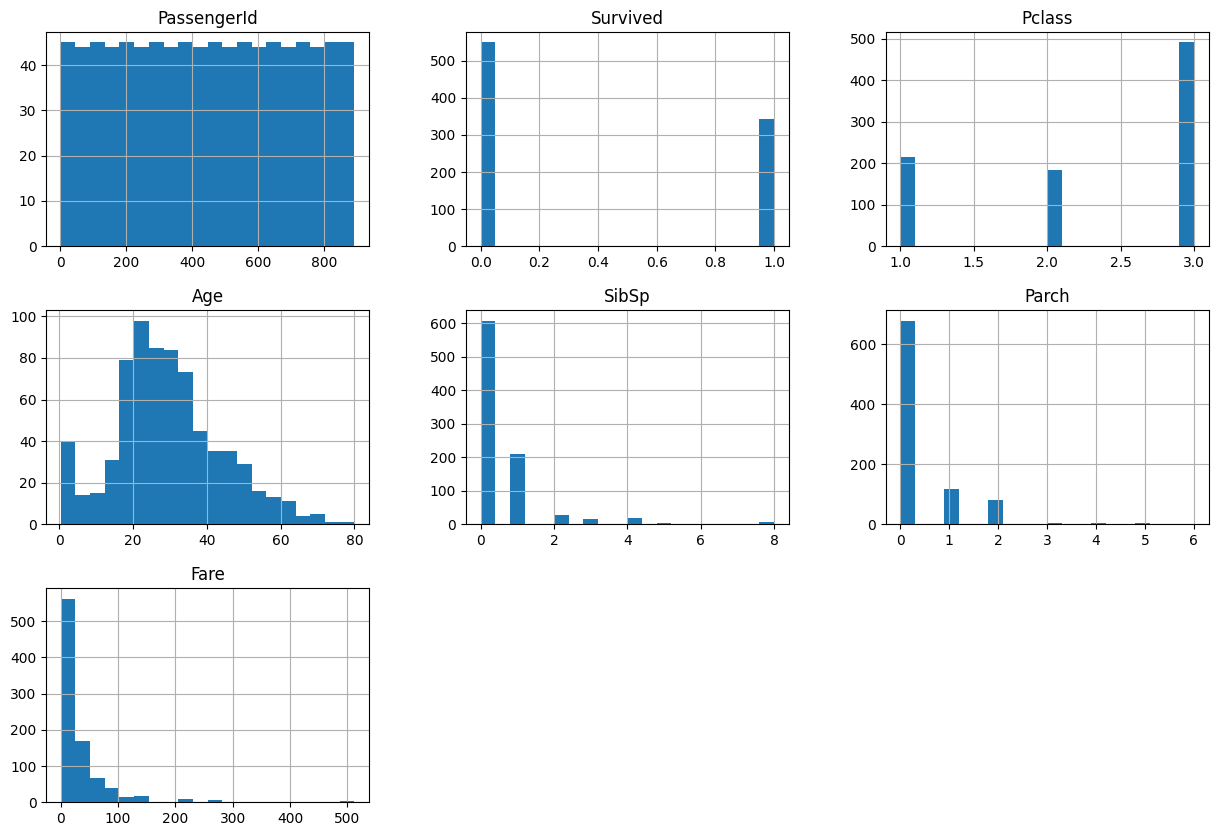

In [9]:
# See overview of the numerical column using histogram
train_df.hist(bins = 20, figsize = [15,10])

Based on the description of numerical features of the training data
1. There are average of 38.4% of survival rate
2. Over 50% of the passenger bought lower class tix (50% of Pclass is 3.0)
3. Average age is 29.7 yrs old, 75% of the passengers were <= 38 years old, oldest is 80 yrs old, , and there are 177 missing data (714 non-null / 891 passengers)
4. Most of the passenger travel without parent/child (at least 75% of passenger travel w/o parent/child)
5. Average paid fare was about 32.2 however max can go up to 512.3

In [10]:
# See summary of categorical column
train_df.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


<Axes: xlabel='Sex'>

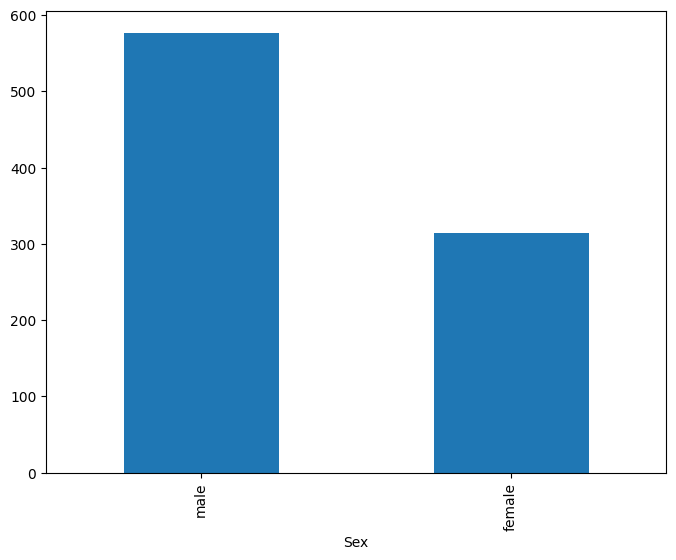

In [11]:
train_df['Sex'].value_counts().plot(kind='bar', figsize=[8, 6])

Based on the description of categorical features of the training data
1. All names are unique (count = unique)
2. For sex data, it's either male/female, and there are more male than female (577 of male)
3. There are duplicated ticket number (only 681 unique value out of 891 ticket number)
4. Cabin has many missing data (only 204 recorded value out of total of 891 passengers)
5. Most of the passenger embark from port S (644), and there are 2 missing data (889 non-null / 891 passengers)

#### Findings from EDA I
Based on the initial analysis of numerical and categorical features, the following has been summarized:
1. PassengerId, Name, and Ticket are only acting as identifiers and add no predictive value, will be excluded from the model.
2. Cabin has many missing data hence will be ignored for now.
4. For remaining features, it is grouped based on its data characteristics:  
    a) **Categorical data**:  
        - i) **Nominal**: Sex, Embarked (categories with no inherent order)  
        - ii) **Ordinal**: Pclass (categories with a meaningful order)  
    b) **Numerical data**:  
        - i) **Discrete**: Parch, SibSp (countable, finite values)  
        - ii) **Continuous**: Age, Fare (measured values, can take any range)  
5. Among the remaining features, 'Age' and 'Embarked' features have missing value however it is relatively low number, it will be handled in the later stage.

### EDA Part II  

Previously in Data Analysis Part I, the overall data structure and characteristics have been studied, and the relevant features have been filtered.

In Data Analysis Part II, further analysis will be conducted to understand the correlation between the features and target (Survival).

**Pivoting the data**

First, correlation can be studied by grouping and pivoting features against the target, to understand the distribution of each distinct value within the feature in relation to the target. However it does not make sense to do it with continuous data as the distinct value could be as large as the size of whole dataset.

In [12]:
train_df.groupby(by = ['Sex'], as_index = False)['Survived'].agg([('TotalPassengerCount','count'),('TotalSurvivedPassenger','sum'),('AvgSurvivalRate','mean')])

,Sex,TotalPassengerCount,TotalSurvivedPassenger,AvgSurvivalRate
0,female,314,233,0.742038
1,male,577,109,0.188908


In [13]:
train_df.groupby(by = 'Embarked', as_index = False)['Survived'].agg([('TotalPassengerCount','count'),('TotalSurvivedPassenger','sum'),('AvgSurvivalRate','mean')])

,Embarked,TotalPassengerCount,TotalSurvivedPassenger,AvgSurvivalRate
0,C,168,93,0.553571
1,Q,77,30,0.389610
2,S,644,217,0.336957


In [14]:
train_df.groupby(by = 'Pclass', as_index = False)['Survived'].agg([('TotalPassengerCount','count'),('TotalSurvivedPassenger','sum'),('AvgSurvivalRate','mean')])

,Pclass,TotalPassengerCount,TotalSurvivedPassenger,AvgSurvivalRate
0,1,216,136,0.629630
1,2,184,87,0.472826
2,3,491,119,0.242363


In [15]:
train_df.groupby(by = 'Parch', as_index = False)['Survived'].agg([('TotalPassengerCount','count'),('TotalSurvivedPassenger','sum'),('AvgSurvivalRate','mean')])

,Parch,TotalPassengerCount,TotalSurvivedPassenger,AvgSurvivalRate
0,0,678,233,0.343658
1,1,118,65,0.550847
2,2,80,40,0.500000
3,3,5,3,0.600000
4,4,4,0,0.000000
5,5,5,1,0.200000
6,6,1,0,0.000000


In [16]:
train_df.groupby(by = 'SibSp', as_index = False)['Survived'].agg([('TotalPassengerCount','count'),('TotalSurvivedPassenger','sum'),('AvgSurvivalRate','mean')])

,SibSp,TotalPassengerCount,TotalSurvivedPassenger,AvgSurvivalRate
0,0,608,210,0.345395
1,1,209,112,0.535885
2,2,28,13,0.464286
3,3,16,4,0.250000
4,4,18,3,0.166667
5,5,5,0,0.000000
6,8,7,0,0.000000


Based on the analysis above, there are some interesting findings:
1. Female has a high survival rate in comparison to male (Female 74% survival, Male 18.9% survival)
2. Passengers embarked at 'C' has higher survival rate compare to the rest
3. The higher the Pclass, the higher the survival rate
4. For Parch and SibSp, they have similar distribution and pattern

**Visualizing the data**

Let's investigate the remaining continuous features (Age, Fare) by visualizing it against the target (survival)

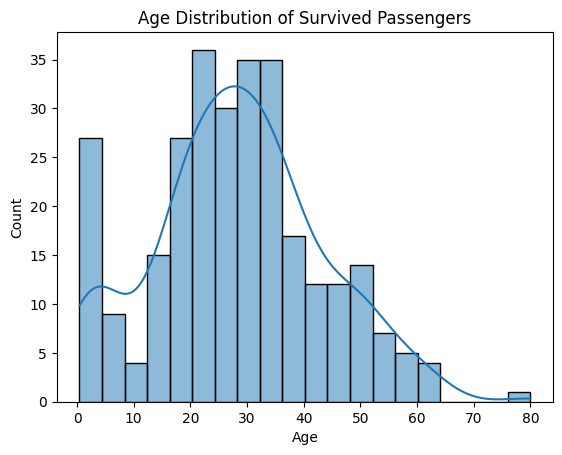

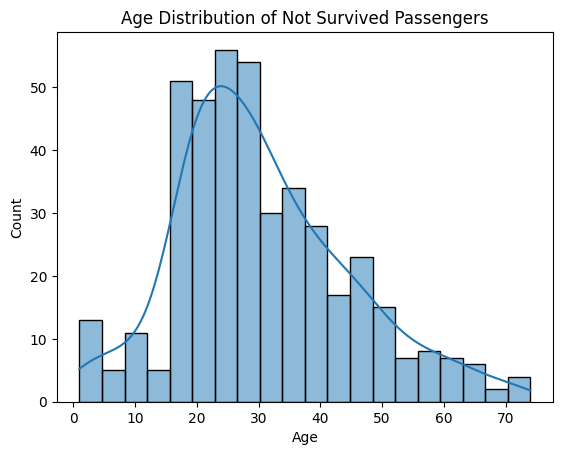

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
survived_age_df = train_df[train_df['Survived'] == 1]['Age']
not_survived_age_df = train_df[train_df['Survived'] == 0]['Age']
sns.histplot(survived_age_df,kde = True, bins = 20)
plt.title('Age Distribution of Survived Passengers')
plt.show()
sns.histplot(not_survived_age_df,kde = True, bins = 20, legend= True)
plt.title('Age Distribution of Not Survived Passengers')
plt.show()
# train_df['Age'].hist(by=train_df['Survived'],bins = 20, figsize = [10,5])

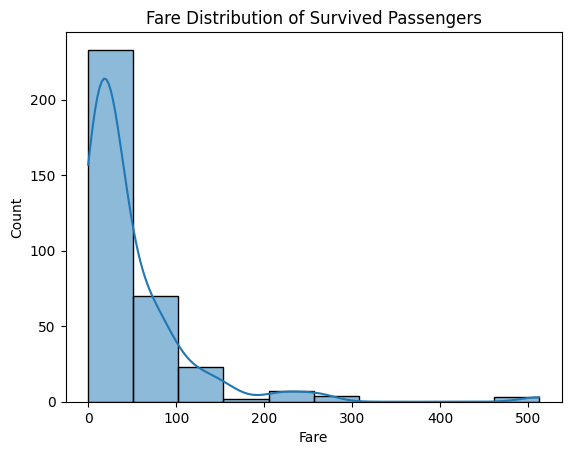

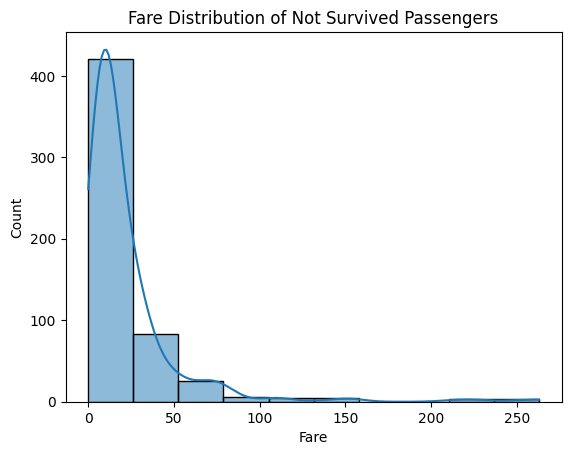

In [18]:
survived_fare_df = train_df[train_df['Survived'] == 1]['Fare']
not_survived_fare_df = train_df[train_df['Survived'] == 0]['Fare']

sns.histplot(survived_fare_df,kde = True, bins = 10)
plt.title('Fare Distribution of Survived Passengers')
plt.show()
sns.histplot(not_survived_fare_df,kde = True, bins = 10)
plt.title('Fare Distribution of Not Survived Passengers')
plt.show()

Findings were made by observing the visualized relationship between continuous features and target
1. In terms of the age of survived and not survived passengers, both distribution are actually very similar, however, one significant difference is that more infants and kids managed to survive, as well as the oldest passenger (80 years old)
2. In terms of the fare of survived and not survived passengers, it can be observed that survived passengers generally pay higher fare than those who did not survive.

#### Findings from EDA II
After investigating the relationship between the selected features and target, the analysis results show that all of the selected features have correlation with target and should all be considered later during the training. For features that have missing data, it will be handled during data preprocessing.

## Data Preprocessing

### Feature Engineering

After understanding the relevancy and correlation of each features, it is crucial to perform feature engineering to ensure better model performance. Steps of feature engineering included: 
  - Feature Creation (create new feature which highlights the relevant features) 
  - Feature Selection (select only relevant features)
  - Feature Transformation (handle missing data, scaling and encoding)


In [19]:
# Import necessary library for data preprocessing and building pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
SEED = 0

# Split into feature and target
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [20]:
# Feature Creation

# Name will be used to create several feature such as title, is_married
all_title = X['Name'].str.split(',', expand = True)[1].str.split('.',expand = True)[0]
unique_title = all_title.unique()
unique_title = [x.strip() for x in unique_title]
unique_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [21]:
# Feature Creation
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureCreationTransformer (BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self,X):
        # Make a copy of X
        X = X.copy()
        # Parch and SibSp will be combined into new feature named 'FamilySize'
        family_size = X['Parch'] + X['SibSp'] + 1
        X['FamilySizeGroup'] = family_size.apply(self.get_family_size_group)
        # Group title based on names:
        title = X['Name'].apply(self.grouping_title)
        # # Determine whether or not female is married
        # X['IsMarried'] = (X['Title'] == 'Mrs').astype(int)
        # # Create relationship for title and pclass, e.g. wealthy/royalty women might have higher survival rate than women in 3rd class
        X['Title_Pclass'] = title.astype(str) + '_' + X['Pclass'].astype(str)
        # Those who are holding the same ticket are likely to travel in group
        X['GroupSize'] = X.groupby('Ticket')['Ticket'].transform('count')

        X['Age_Group'] = X.apply(self.get_age_group, axis = 1)
        
        return X
    
    def grouping_title(self,name):
        title = self.get_title(name)
        if title == 'Mr' or title == 'Master':
            return title
        elif title in ['Miss','Ms','Mlle']:
            return 'Ms'
        elif title in ['Mrs','Mme']:
            return 'Mrs'
        elif title in ['Lady','the Countess','Sir','Don','Jonkheer']:
            return 'Nobility'
        elif title in ['Rev','Dr','Major','Col','Capt']:
            return 'Professional'
        else:
            return 'Others'

    def get_title(self,full_name):
        name = full_name.split(',')[1]
        title = name.split('.')[0]
        return title.strip()

    def get_family_size_group(self, family_size):
        if family_size == 1:
            return 'Alone'
        elif family_size > 1 and family_size <= 3:
            return 'Small'
        elif family_size > 3 and family_size <= 5:
            return 'Medium'
        else:
            return 'Large'

    def get_age_group(self, X):
        age = X['Age']
        gender = X['Sex']

        if age < 13:
            return 'Child'
        elif age >13 and age < 18:
            return 'Teenager'
        elif age >=18 and age < 60 and gender == 'male':
            return 'AdultMale'
        elif age >=18 and age < 60 and gender == 'female':
            return 'AdultFemale'
        else:
            return 'SeniorCitizen'
    
    def get_feature_names_out(self, input_features=None):
        return ['FamilySizeGroup','Title_Pclass','GroupSize','Age_Group']  # Explicitly return feature names
    
    
# Separate columns based on datatype of numerical and categorical
numerical_col = X.select_dtypes(include = 'number').columns
categorical_col = X.select_dtypes(include = 'object').columns
family_col = ['Parch','SibSp']
col_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']


In [22]:

# Feature Selection
# Remove the column of col_to_drop from both numerical and categorical col
numerical_col = [col for col in numerical_col if col not in (col_to_drop + family_col)]
categorical_col = [col for col in categorical_col if col not in (col_to_drop + family_col)]

# Feature Transformation (impute missing data, scale numerical features and encode categorical features
numerical_steps = [('imputer',SimpleImputer()), ('scalar',StandardScaler())]
categorical_steps = [('imputer',SimpleImputer(strategy = 'most_frequent')), ('onehot',OneHotEncoder(handle_unknown= 'ignore'))]
# family_feature_steps = [('familyfeature',FamilyFeatureTransformer())]

### Building Pipeline

Objective is to build a pipeline to automate and bundle the process of data preprocessing and modelling. Such that it could be reused to transform and predict the input data set.

In [23]:
# Create preprocessing pipeline for numerical columns
numerical_transformer = Pipeline(steps = numerical_steps)
categorical_transformer = Pipeline(steps = categorical_steps)

# Combine the numerical and categorical transformer into one column transformer
preprocessor = ColumnTransformer(transformers = [('num_transformer', numerical_transformer, numerical_col+['GroupSize']),
                                                ('cat_transformer', categorical_transformer, categorical_col + ['FamilySizeGroup'] +['Title_Pclass']+['Age_Group']),
                                                ('drop_col', 'drop', col_to_drop)])

This is a classification problem as the objective is to predict whether or not a passenger is survived (1) or not survived (0). Logistic regression is chosen to be used as the base model to be combined into a pipeline, as it is a relatively simple and intuitive model, and it is computationally efficient in comparison to other model.

In [24]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Building the final pipeline
pipeline = Pipeline(steps = [('featureCreation',FeatureCreationTransformer()),('preprocessor',preprocessor), ('model',LogisticRegression(random_state= SEED))])

Split the data into training and validation data. Training data is used to fit the pipeline, then all of the data (training, validation and test) will be transformed using the defined pipeline.

Reason why to split the data before fitting is to prevent any data leakage and overfitting.

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation data for features and target
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2, random_state = SEED)

# Fit the data
pipeline.fit(X_train,y_train)
print('Successfully fitted the data to pipeline')

Successfully fitted the data to pipeline


In [26]:
def get_transformed_df(X):
    # First, apply the FamilyFeatureTransformer and get the data with new features
    X_family_transformed = pipeline.named_steps['featureCreation'].transform(X)
    
    # Then, apply the Preprocessor (which will scale and encode)
    X_preprocessed = pipeline.named_steps['preprocessor'].transform(X_family_transformed)

    X_preprocessed = X_preprocessed.toarray()
    
    # Manually define feature names
    num_features_out = pipeline.named_steps['preprocessor'].named_transformers_['num_transformer'].get_feature_names_out()
    cat_features_out = pipeline.named_steps['preprocessor'].named_transformers_['cat_transformer'].get_feature_names_out()

    # Manually add family features
    # family_features_out = ['FamilySize', 'IsAlone']
    
    # Combine all feature names
    all_feature_names = list(num_features_out) + list(cat_features_out)

    # model = pipeline.named_steps['model']
    # feature_importances = pd.Series(model.feature_importances_, index=all_feature_names)
    # print(feature_importances.sort_values(ascending=False))
    
    # Convert to DataFrame
    X_transformed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)
    
    return X_transformed_df


In [27]:
pd.set_option('display.max_columns',None)
get_transformed_df(X_train)

,Pclass,Age,Fare,GroupSize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySizeGroup_Alone,FamilySizeGroup_Large,FamilySizeGroup_Medium,FamilySizeGroup_Small,Title_Pclass_Master_1,Title_Pclass_Master_2,Title_Pclass_Master_3,Title_Pclass_Mr_1,Title_Pclass_Mr_2,Title_Pclass_Mr_3,Title_Pclass_Mrs_1,Title_Pclass_Mrs_2,Title_Pclass_Mrs_3,Title_Pclass_Ms_1,Title_Pclass_Ms_2,Title_Pclass_Ms_3,Title_Pclass_Nobility_1,Title_Pclass_Professional_1,Title_Pclass_Professional_2,Age_Group_AdultFemale,Age_Group_AdultMale,Age_Group_Child,Age_Group_SeniorCitizen,Age_Group_Teenager
0,0.819251,0.000000,-0.331679,0.346909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.380968,0.095932,-0.426405,-0.548016,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.380968,0.095932,0.102620,0.346909,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.819251,-0.745030,-0.555896,-0.548016,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.819251,-0.668579,-0.491276,-0.548016,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,-1.581187,0.707541,1.023857,-0.548016,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
708,0.819251,-0.821481,-0.479216,-0.548016,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
709,0.819251,0.000000,-0.481629,-0.548016,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
710,0.819251,0.478187,-0.288681,-0.548016,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Model Evaluation

### Evaluation Process

It is possible to evaluate more than one model in this case study, hence evaluation process and metrics are required to be standardized to give a fair evaluation. Since we are potentially evaluating with different models, it is useful to create a reusable function to consolidate the evaluation process. Model will be evaluated with the following approach:
  - Tabulate confusion matrix to understand the error
  - Tabulate classification matrix
  - Evaluate ROC-AUC and log-loss

In [28]:
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, log_loss
)

def evaluate_model(pipeline, X, y, y_pred):
    # Confusion matrix visualization
    ConfusionMatrixDisplay.from_predictions(y,y_pred)
    # Classification matrix
    print(classification_report(y,y_pred))
    # Print out roc_auc score and log_loss
    print(f'roc_auc_score {roc_auc_score(y,y_pred)}')
    print(f'log_loss {log_loss(y,y_pred)}')


### Base Model Evaluation (Logistic Regression)

As mentioned in the previous chapter (Data Preprocessing), Logistic Regression model is chosen to be the base model due to its intuitive and resource friendly nature. Further fine tune of the model or alternate complex model is required if the base model is underperforming.

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       439
           1       0.84      0.73      0.78       273

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712

roc_auc_score 0.821881231904011
log_loss 5.669788173568991


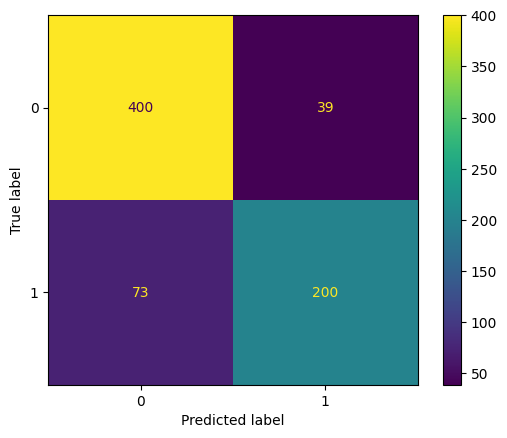

In [29]:
# Transform and predict the training data
y_train_pred = pipeline.predict(X_train)
# Evaluate the base model with training data
evaluate_model(pipeline,X_train,y_train,y_train_pred)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

roc_auc_score 0.7986824769433466
log_loss 6.6449193398931055


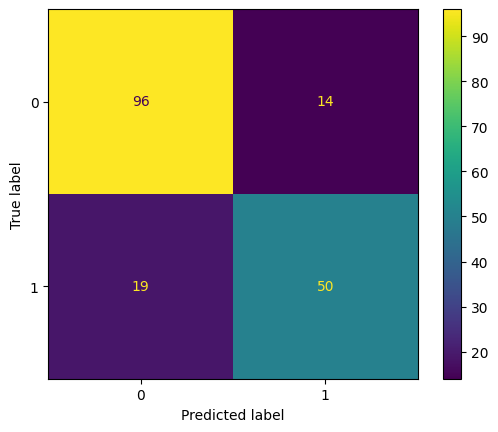

In [30]:
# Transform and predict the validation data
y_val_pred = pipeline.predict(X_val)
# Evaluate the base model with validation data
evaluate_model(pipeline,X_val,y_val,y_val_pred)

**Findings of base model**

Looking at the overall results, base model seems to deliver a decent results. In this case study, focus would be on accuracy, as mentioned in Introduction, our goal is to submit results with highest accuracy

### Model 2 Evaluation (Random Forest)

Random forest is a slightly more complicated model compare to base model (logistic regression) however it is more accurate and can handle imbalanced data better.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       439
           1       1.00      0.96      0.98       273

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

roc_auc_score 0.9805460295209727
log_loss 0.5568541956183831


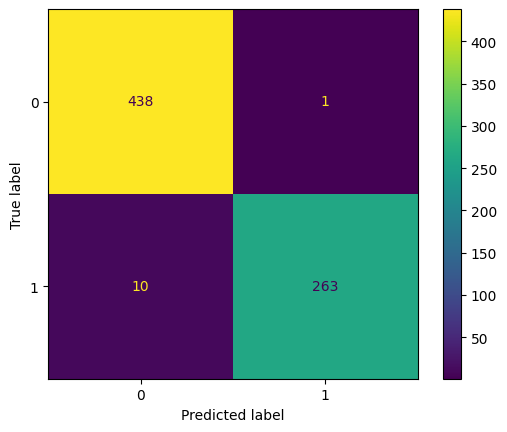

In [31]:
from sklearn.ensemble import RandomForestClassifier
# Change the model to random forest
pipeline.set_params(model=RandomForestClassifier(n_estimators=100,random_state = SEED)) 
# Fit the training data
pipeline.fit(X_train, y_train)
# Transform and predict the training data
y_train_pred = pipeline.predict(X_train)
# Evaluate the random forest model with training data
evaluate_model(pipeline,X_train,y_train,y_train_pred)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

roc_auc_score 0.8050724637681159
log_loss 6.242196955657161


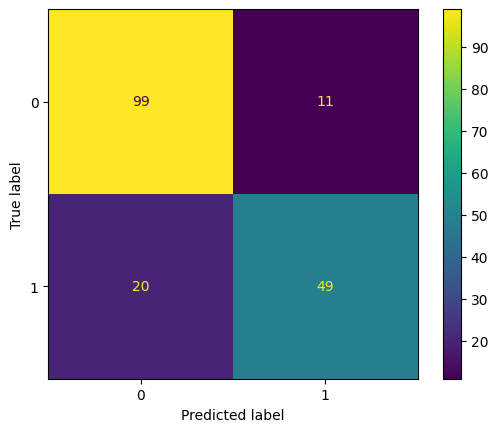

In [32]:
# Transform and predict the validation data
y_val_pred = pipeline.predict(X_val)
# Evaluate the random forest model with validation data
evaluate_model(pipeline,X_val,y_val,y_val_pred)

**Findings of model 2 evaluation (Random Forest)**

Looking at the overall results, using Random Forest seems to deliver a slightly better results. It performed very well with training data however it is slightly better with base model when it comes to validation data. This indicates that model has overfitted.

### Model 3 Evaluation (XGBoost)

XGBoost is a complex model which brings in one of the best overall performance and accuracy among all other algorithms.

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       439
           1       0.98      0.95      0.97       273

    accuracy                           0.97       712
   macro avg       0.98      0.97      0.97       712
weighted avg       0.97      0.97      0.97       712

roc_auc_score 0.9698031657029379
log_loss 0.911215956466445


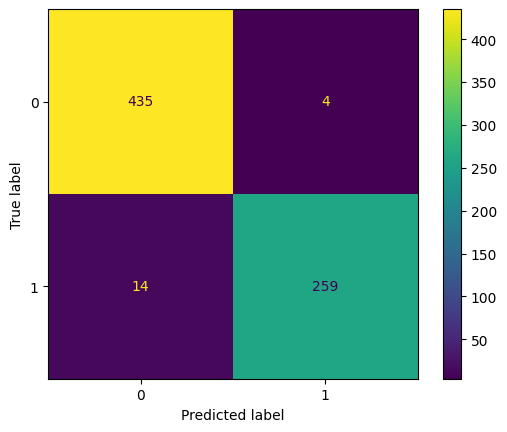

In [33]:
from xgboost import XGBClassifier
# Change the model to xgboost
pipeline.set_params(model=XGBClassifier(random_state = SEED)) 
# Fit the training data
pipeline.fit(X_train, y_train)
# Transform and predict the training data
y_train_pred = pipeline.predict(X_train)
# Evaluate the xgboost model with training data
evaluate_model(pipeline,X_train,y_train,y_train_pred)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       110
           1       0.84      0.78      0.81        69

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179

roc_auc_score 0.8458498023715415
log_loss 5.034029802949323


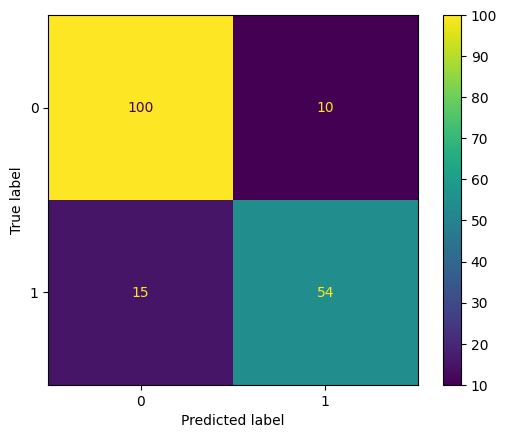

In [34]:
# Transform and predict the validation data
y_val_pred = pipeline.predict(X_val)
# Evaluate the xgboost model with validation data
evaluate_model(pipeline,X_val,y_val,y_val_pred)

**Findings of model 3 evaluation (XGBoost)**

Looking at the overall results, using XGBoost seems to deliver a similar results with using Random Forest. It performed very well with training data however it is slightly better with base model when it comes to validation data. This indicates that model has overfitted.

### Fine Tuning of Model 2 (Random Forest) and Model 3 (XGBoost)

Looking at the performance of each model, generally Random Forest and XGBoost has better predictive power than base model (Logistic Regression) however it suggest that model has been overfitted. Hence GridSearchCV will be used to perform hyperparameter tuning such that best hyperparameters can be determined that would performed the best for both training and validation data.



### Model Fine Tuning (Random Forest & XGBoost)

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
# List down the hyperparameters for grid search
param_grid = [
    {'model':[RandomForestClassifier(random_state = SEED)],
    'model__n_estimators':[25,50,100,200],
    'model__max_depth':[5, 10,15,20],
    'model__min_samples_split':[5,10,15,20]}
    # ,{'model':[XGBClassifier(random_state = SEED, early_stopping_rounds=10)],
    # 'model__n_estimators':[25,50,100,200],
    # 'model__subsample':[0.7, 0.8, 0.9, 1.0],
    # 'model__max_depth':[3,5],
    # 'model__learning_rate':[0.01,0.05,0.1]}
]

grid_search = GridSearchCV(pipeline,param_grid, scoring = 'accuracy', cv=10)
grid_search.fit(X_train,y_train)
print(f'Best hyperparam {grid_search.best_params_}')

Best hyperparam {'model': RandomForestClassifier(random_state=0), 'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 100}


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       439
           1       0.91      0.78      0.84       273

    accuracy                           0.89       712
   macro avg       0.90      0.87      0.88       712
weighted avg       0.89      0.89      0.89       712

roc_auc_score 0.8691623486612097
log_loss 3.9992255867138415


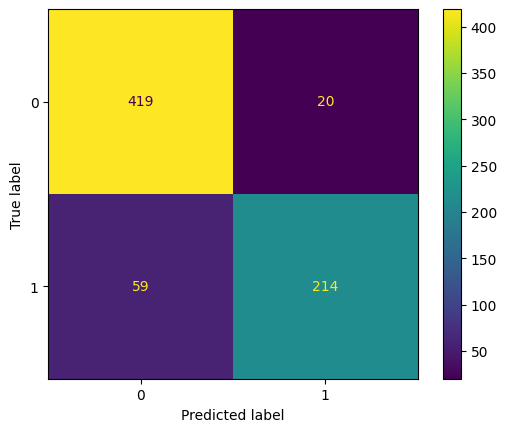

In [37]:
# Predict the results again with the best estimator
best_pipeline = grid_search.best_estimator_

y_pred = best_pipeline.predict(X_train)
evaluate_model(best_pipeline,X_train,y_train,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.86      0.72      0.79        69

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179

roc_auc_score 0.8259552042160738
log_loss 5.436752187185268


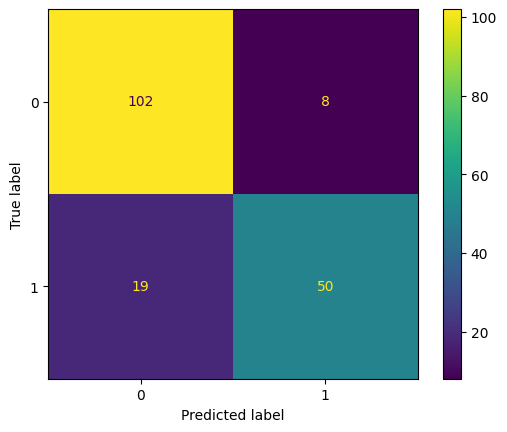

In [38]:
# Transform and predict the validation data
y_val_pred = best_pipeline.predict(X_val)
# Evaluate the model with validation data
evaluate_model(best_pipeline,X_val,y_val,y_val_pred)

**Findings of Model Fine Tuning**

Looking at the best model with corresponding best parameter determined by GridSearchCV, it could yield an accuracy of 0.85 in predicting validation data. Next step would be predicting the test data and submitting to kaggle.

The best model and param is the following:  

In [39]:
print(f'Best hyperparam {grid_search.best_params_}')

Best hyperparam {'model': RandomForestClassifier(random_state=0), 'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 100}


## Test Data Prediction

### Test Data Prediction and Exporting Results

The test data will be feed to the trained model and results will be exported to local machine.

In [40]:
# Import test data here
test_data = pd.read_csv(r'C:\Users\user\Documents\GitRepository\titanic_machine_learning\InData\test.csv',index_col=0)
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [41]:
# Here we create a function to encapsulate the prediction and exporting process
def PredictAndExport(pipeline, X_test, filePath, useIndex = False):
    y_test = pipeline.predict(X_test)
    final_output = {'PassengerId':test_data.index, 'Survived':y_test}
    test_result_df = pd.DataFrame(final_output)
    print('Final prediction:')
    print(test_result_df)
    # Write the final prediction result to csv
    test_result_df.to_csv(path_or_buf=filePath, index = useIndex)
    print('Successfully exported as csv')

In [42]:
# Predict and export the result
filePath = r'C:\Users\user\Documents\GitRepository\titanic_machine_learning\OutData\titanic_survival_prediction.csv'
PredictAndExport(best_pipeline, test_data, filePath)

Final prediction:
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
Successfully exported as csv


## First Test Data Submission Review

After submitting to Kaggle, the prediction score is only 0.77, indicating clear room for improvement.

At this stage, several optimizations have already been applied, including removing redundant features, filling in missing data for relevant features, scaling and encoding features, optimized the training model. The next step will be to focus on feature engineering.